In [1]:
import numpy as np, os
import matplotlib as mpl
%matplotlib notebook

In [2]:
from matplotlib import pyplot as plt

In [3]:
workdir = '_tmp.explore-random-sampling-all-UC-axis-dependent-scaling-include-negative-Qs'
!mkdir -p {workdir}
%cd {workdir}

/home/lj7/dv/mcvine/phonon/tests/phonon/_tmp.explore-random-sampling-all-UC-axis-dependent-scaling-include-negative-Qs


In [4]:
from mcvine.phonon.from_phonopy import call_phonopy

In [5]:
supercell = 6,6,1
sc_mat = np.diag(supercell)

In [6]:
graphite_datadir = os.path.abspath('../../data/graphite/')

In [7]:
from phonopy import file_IO
force_constants=file_IO.parse_FORCE_CONSTANTS(os.path.join(graphite_datadir, 'FORCE_CONSTANTS'))

In [8]:
poscar = os.path.join(graphite_datadir, 'POSCAR')

In [9]:
species = ['C']

In [106]:
qpoints = [[0.,0.,0.], [1,0,0], [0,1,0], [0,0,1], [1,1,0], [1,0,1], [0, 1,1], [1,1,1]]

In [129]:
qs, freqs, pols = call_phonopy.onGrid(
    species, qpoints, sc_mat, 
    force_constants = force_constants,
    poscar = poscar,
    freq2omega=1
)

In [130]:
freqs.shape

(8, 12)

In [131]:
freqs[0]

array([  3.34225831e-02,   3.34225831e-02,   9.28652901e-02,
         1.52100901e+00,   1.52100901e+00,   2.61040097e+00,
         2.63887591e+01,   2.65558347e+01,   4.76904068e+01,
         4.76904068e+01,   4.78045328e+01,   4.78045328e+01])

In [132]:
freqs[1]

array([  3.34225831e-02,   3.34225831e-02,   9.28652901e-02,
         1.52100901e+00,   1.52100901e+00,   2.61040097e+00,
         2.63887591e+01,   2.65558347e+01,   4.76904068e+01,
         4.76904068e+01,   4.78045328e+01,   4.78045328e+01])

In [133]:
freqs[2]

array([  3.34225831e-02,   3.34225831e-02,   9.28652901e-02,
         1.52100901e+00,   1.52100901e+00,   2.61040097e+00,
         2.63887591e+01,   2.65558347e+01,   4.76904068e+01,
         4.76904068e+01,   4.78045328e+01,   4.78045328e+01])

In [134]:
pols.shape

(8, 12, 4, 3)

In [135]:
norms = np.linalg.norm(pols, axis=-1)

In [136]:
pols/=norms[:, :, :, np.newaxis]

In [138]:
pols[0][2]

array([[ -1.38736765e-11+0.j,   8.71603397e-12+0.j,  -1.00000000e+00+0.j],
       [ -1.37925833e-11+0.j,   8.75866422e-12+0.j,  -1.00000000e+00+0.j],
       [ -1.38740305e-11+0.j,   8.71665564e-12+0.j,  -1.00000000e+00+0.j],
       [ -1.37932231e-11+0.j,   8.75860894e-12+0.j,  -1.00000000e+00+0.j]])

In [139]:
pols[2][2]

array([[ -2.93171020e-12 +0.00000000e+00j,
         -5.72838949e-12 +7.00260722e-13j,
          5.35602900e-02 -9.98564618e-01j],
       [ -2.91216769e-12 -8.97721175e-15j,
         -5.77391888e-12 +6.96875817e-13j,
          5.35602900e-02 -9.98564618e-01j],
       [  1.46602151e-12 -2.53887217e-12j,
          2.25764516e-12 -5.31157875e-12j,
          8.38002193e-01 +5.45666863e-01j],
       [  1.44805952e-12 +2.52665096e-12j,
          3.49036775e-12 +4.65205638e-12j,
         -8.91562481e-01 +4.52897718e-01j]])

In [140]:
positions

array([[ 0.        ,  0.        ,  0.25      ],
       [ 0.        ,  0.        ,  0.75      ],
       [ 0.33333333,  0.66666667,  0.25      ],
       [ 0.66666667,  0.33333333,  0.75      ]])

In [145]:
cat {poscar}

C
    1.0
       2.44618916393 0.00000000000   0.00000000000           
      -1.22309458197 2.11846195843   0.00000000000
       0.00000000000   0.00000000000 6.65422904762 
  4
Direct
        0.00000000 0.00000000 0.25000000
        0.00000000 0.00000000 0.75000000
        0.33333333 0.66666667 0.25000000
        0.66666667 0.33333333 0.75000000


In [141]:
%%time
for iatom in range(natoms):
    qdotr = np.dot(qs, positions[iatom]) * 2 * np.pi
    phase = np.exp(-1j * qdotr)
    pols[:, :, iatom, :] *= phase[:, np.newaxis, np.newaxis]
    norms = np.linalg.norm(pols, axis=-1)
    pols/=norms[:, :, :, np.newaxis]
    continue

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.51 ms


In [142]:
pols.shape

(8, 12, 4, 3)

In [143]:
pols[0][2]

array([[ -1.38736765e-11+0.j,   8.71603397e-12+0.j,  -1.00000000e+00+0.j],
       [ -1.37925833e-11+0.j,   8.75866422e-12+0.j,  -1.00000000e+00+0.j],
       [ -1.38740305e-11+0.j,   8.71665564e-12+0.j,  -1.00000000e+00+0.j],
       [ -1.37932231e-11+0.j,   8.75860894e-12+0.j,  -1.00000000e+00+0.j]])

In [144]:
pols[2][2]

array([[ -2.93171020e-12 +0.00000000e+00j,
         -5.72838949e-12 +7.00260722e-13j,
          5.35602900e-02 -9.98564618e-01j],
       [ -2.91216769e-12 -8.97721175e-15j,
         -5.77391888e-12 +6.96875817e-13j,
          5.35602900e-02 -9.98564618e-01j],
       [  1.46571709e-12 +2.53904793e-12j,
          3.47113965e-12 +4.61096736e-12j,
         -8.91562452e-01 +4.52897774e-01j],
       [  1.46411422e-12 -2.51738178e-12j,
          2.28361524e-12 -5.34877528e-12j,
          8.38002158e-01 +5.45666916e-01j]])

# random
[-1, 1]

In [146]:
%%time
N = int(1e7)
N = int(1e6)
qpoints = np.random.rand(N, 3) * 2 - 1

CPU times: user 84 ms, sys: 8 ms, total: 92 ms
Wall time: 88.1 ms


In [147]:
qpoints.shape

(1000000, 3)

In [148]:
qpoints[:, :2] *= 9
qpoints[:, -1] *= 3

about an hour?

In [149]:
%%time
qs, freqs, pols = call_phonopy.onGrid(
    ['C'], qpoints, sc_mat, 
    force_constants = force_constants,
    poscar = os.path.join(graphite_datadir, 'POSCAR'),
    freq2omega=1
)

CPU times: user 31min 8s, sys: 47min 35s, total: 1h 18min 43s
Wall time: 6min 37s


In [150]:
freqs[freqs<0] = 0

In [151]:
# omega2 = freqs**2 * 1e24 * (2*np.pi)**2

In [152]:
omega = freqs*1e12*2*np.pi

In [153]:
nq, nbr, natoms, three = pols.shape

In [154]:
assert three is 3

In [155]:
from phonopy.interface import vasp
atoms = vasp.read_vasp(poscar, species)
positions = atoms.get_scaled_positions()

In [156]:
%%time
for iatom in range(natoms):
    qdotr = np.dot(qs, positions[iatom]) * 2 * np.pi
    phase = np.exp(-1j * qdotr)
    pols[:, :, iatom, :] *= phase[:, np.newaxis, np.newaxis]
    norms = np.linalg.norm(pols, axis=-1)
    pols/=norms[:, :, :, np.newaxis]
    continue

CPU times: user 14.4 s, sys: 11.7 s, total: 26 s
Wall time: 16.2 s


# Compute

In [157]:
from mcvine.phonon import from_phonopy

In [158]:
from_phonopy.make_crystal_xyz('graphite.xyz', species, poscar)

In [159]:
from sampleassembly.crystal.ioutils import xyzfile2unitcell

In [160]:
uc = xyzfile2unitcell('graphite.xyz')

In [161]:
Q_basis = uc.lattice.recbase * 2 * np.pi

In [162]:
Q_basis = Q_basis.T

In [165]:
np.dot(uc.lattice.base, Q_basis.T)

array([[  6.28318531e+00,   0.00000000e+00,   0.00000000e+00],
       [ -5.73318837e-16,   6.28318531e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   6.28318531e+00]])

In [166]:
from mccomponents.sample.idf import units

In [167]:
omega *= units.hertz2mev

In [168]:
omega[0]

array([  48.02055156,   48.95858427,   83.53217923,   83.76746767,
        100.29888419,  100.33149447,  140.50156403,  140.74690945,
        175.2478067 ,  175.42695966,  178.27738893,  178.40843165])

In [169]:
omega.shape

(1000000, 12)

In [170]:
pols.shape

(1000000, 12, 4, 3)

In [171]:
nbranches = nbr

In [172]:
Q_bins = np.arange(0,22, 0.1)
E_bins = np.arange(0,250, 1.)
bins = Q_bins, E_bins
# max Q of requested Q axis                                                                                                                                                                                                                                                                                     
max_Q = Q_bins[-1]

In [173]:
import tqdm

In [174]:
%%time
I = 0
for ibr in tqdm.tqdm(range(nbranches)):
    Q_hkl = qs
    Q_cart = np.dot(Q_hkl, Q_basis)  # nQ, 3   
    Q_mag = np.linalg.norm(Q_cart, axis=-1) # nQ                
    good = Q_mag < max_Q
    Q_mag = Q_mag[good]
    omega0 = omega[good, ibr]
    Q_cart = Q_cart[good]
    #
    exp_Q_dot_d = np.exp(1j * np.dot(Q_cart, positions.T)) # nQ, natoms 
    pols1 = pols[good, ibr, :, :] # nQ, natoms, 3   
    Q_dot_pol = np.sum(np.transpose(pols1, (1,0,2)) * Q_cart, axis=-1).T # nQ, natoms
    # 
    F = np.sum(exp_Q_dot_d * Q_dot_pol, axis=-1) # nQ      
    M = np.abs(F)**2 # nQ       
    I1, Qbb, Ebb = np.histogram2d(Q_mag, omega0, bins=bins, weights=M)
    I = I + I1
    continue

100%|██████████| 12/12 [00:07<00:00,  1.68it/s]

CPU times: user 6.47 s, sys: 684 ms, total: 7.16 s
Wall time: 7.17 s


In [175]:
import histogram as H, histogram.hdf as hh

In [176]:
Q = (Qbb[1:] + Qbb[:-1])/2

In [177]:
IQEhist = H.histogram(
    'IQE',
    (H.axis('Q', boundaries=Qbb, unit='1./angstrom'),
     H.axis('E', boundaries=Ebb, unit='meV')),
    data=I/Q[:, np.newaxis]**2)

plot z in (0.0, 1298.74486233)


<IPython.core.display.Javascript object>


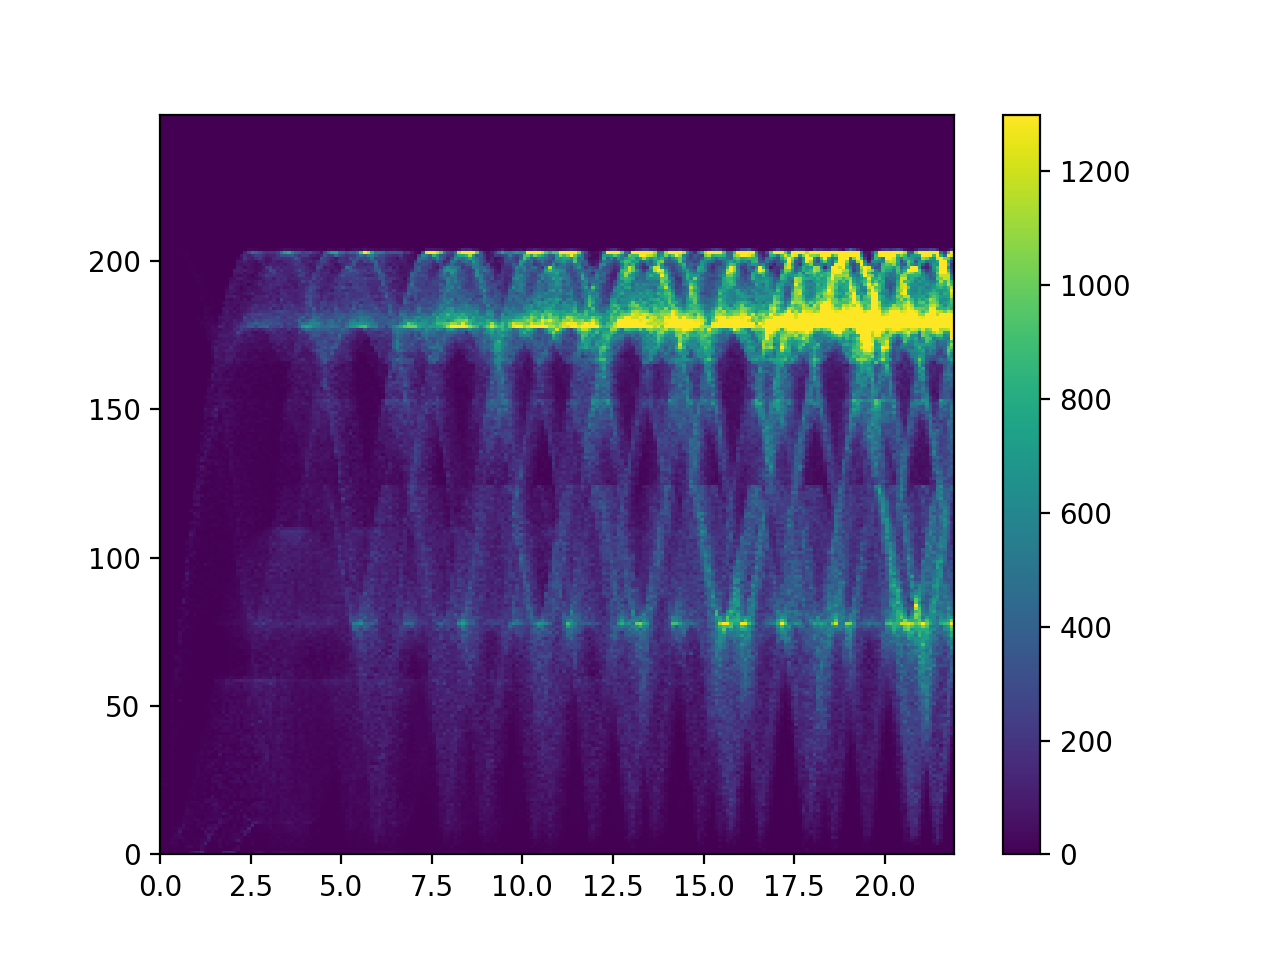

In [178]:
H.plot(IQEhist)

# corrections

In [47]:
Q = (Qbb[1:] + Qbb[:-1])/2

In [48]:
IQEhist2 = H.histogram(
    'IQE',
    (H.axis('Q', boundaries=Qbb, unit='1./angstrom'),
     H.axis('E', boundaries=Ebb, unit='meV')),
    data=I/Q[:, np.newaxis])

plot z in (0.0, 36776.7878514)


<IPython.core.display.Javascript object>


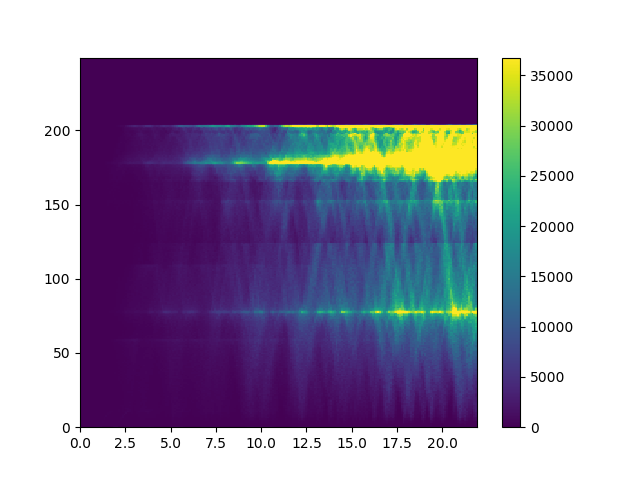

In [49]:
H.plot(IQEhist2)

In [88]:
e, g = np.loadtxt('/SNS/users/lj7/simulations/samples/graphite/dispersions/dos/dos_meV.dat').T

In [89]:
g = np.interp(Ebb, e, g)

<IPython.core.display.Javascript object>


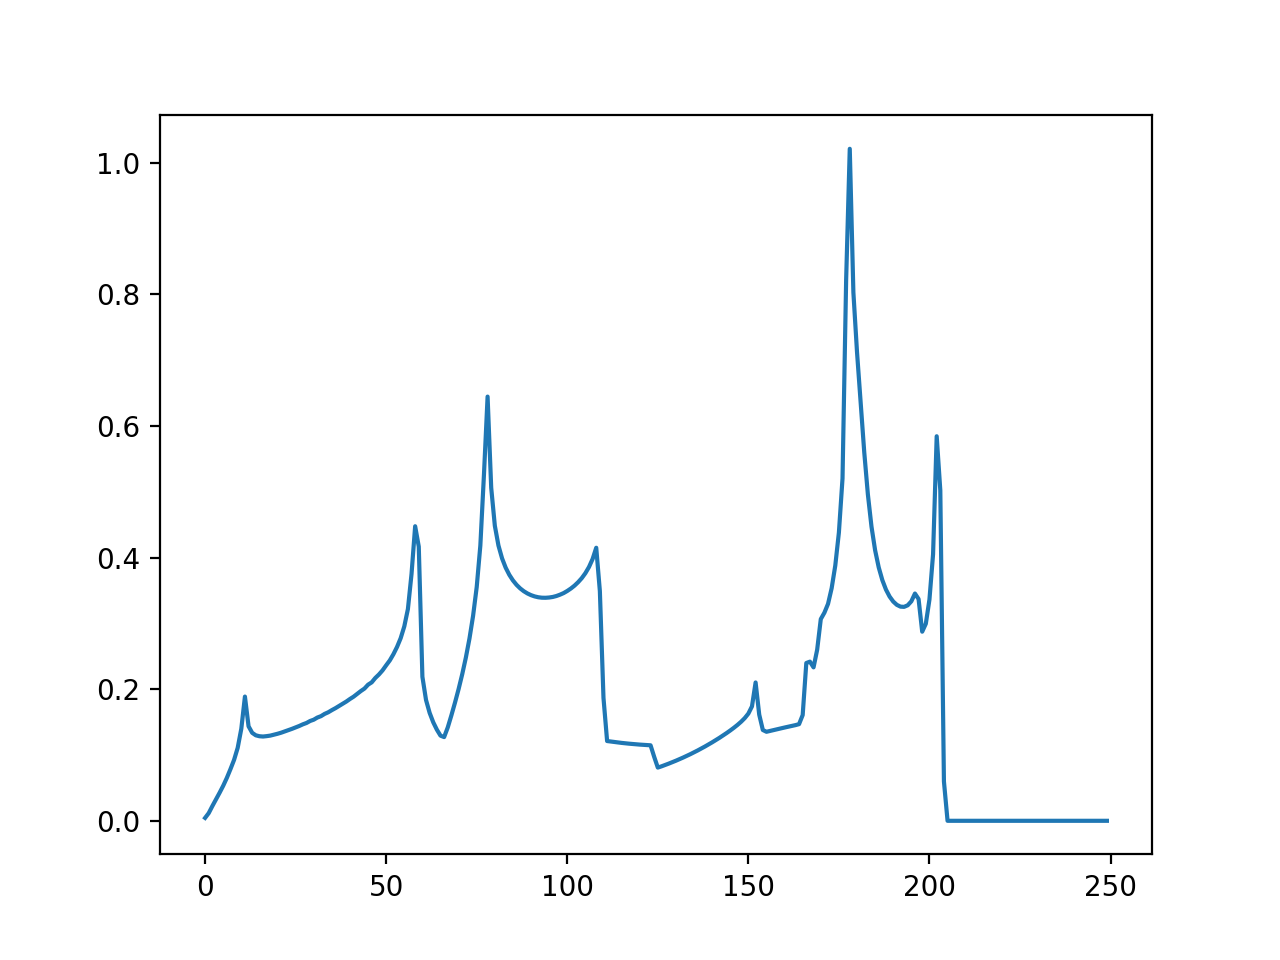

In [90]:
plt.figure()
plt.plot(Ebb, g)

In [66]:
import multiphonon

In [67]:
from multiphonon.forward import phonon

In [75]:
!head -n 10 /SNS/ARCS/IPTS-15398/shared/mantidred/non-radC/non-radC_130p00_summary.txt

-----------VANADIUM CALIBRATION AND MASKING-----------
Calibration loaded from /SNS/lustre/ARCS/IPTS-15398/shared/mantidred/van74333.nxs

-----------DATA REDUCTION-----------------------------
Loaded data run from /SNS/ARCS/IPTS-15398/0/79933/NeXus/ARCS_79933_event.nxs
Added data run from /SNS/ARCS/IPTS-15398/0/79934/NeXus/ARCS_79934_event.nxs
Added data run from /SNS/ARCS/IPTS-15398/0/79939/NeXus/ARCS_79939_event.nxs
Added data run from /SNS/ARCS/IPTS-15398/0/79940/NeXus/ARCS_79940_event.nxs
Added data run from /SNS/ARCS/IPTS-15398/0/79945/NeXus/ARCS_79945_event.nxs
Added data run from /SNS/ARCS/IPTS-15398/0/79946/NeXus/ARCS_79946_event.nxs


In [76]:
!head -n 20 /SNS/ARCS/IPTS-15398/0/79933/preNeXus/ARCS_79933_runinfo.xml

<?xml version="1.0"?>
<RunInfo instrument="ARCS" runnumber="79933" experiment="0" version="4.3" xmlns="http://neutrons.ornl.gov/SNS/DAS/runinfo_v4_3">
<DateTime>
	<StartTime> 2016-05-03T21:22:06-05:00 </StartTime>
	<StopTime> 2016-05-03T21:54:45-05:00 </StopTime>
	<LastUpdate> 2016-05-03T21:54:45-05:00 </LastUpdate>
</DateTime>
<OperationalInfo>
		<AcceleratorPulses> 117535 </AcceleratorPulses>
		<PCurrent units="pC"> 2.000864e+012 </PCurrent>
		<TotalVetos>0</TotalVetos></OperationalInfo>
<SampleInfo Name="REactort Grade Graphite" Identifier="29695">
	<Nature> NONE </Nature>
</SampleInfo>
<GeneralInfo>
	<Title>79933 Graphite_not-irradiated-G2w01 300K Ch2 130meV 600Hz T0 90Hz </Title>
	<Notes>no notes</Notes>
	<SpecialDesignation></SpecialDesignation>
	<ScriptID>none</ScriptID>
	<RunStatus>Stopped</RunStatus>


In [77]:
T=300.
beta = 1./(T*phonon.kelvin2mev)

In [93]:
DW2 = phonon.DWExp(Q, M=12, E=Ebb,g=g/np.sum(g), beta=beta, dE=Ebb[1]-Ebb[0])

In [101]:
%matplotlib notebook

<IPython.core.display.Javascript object>


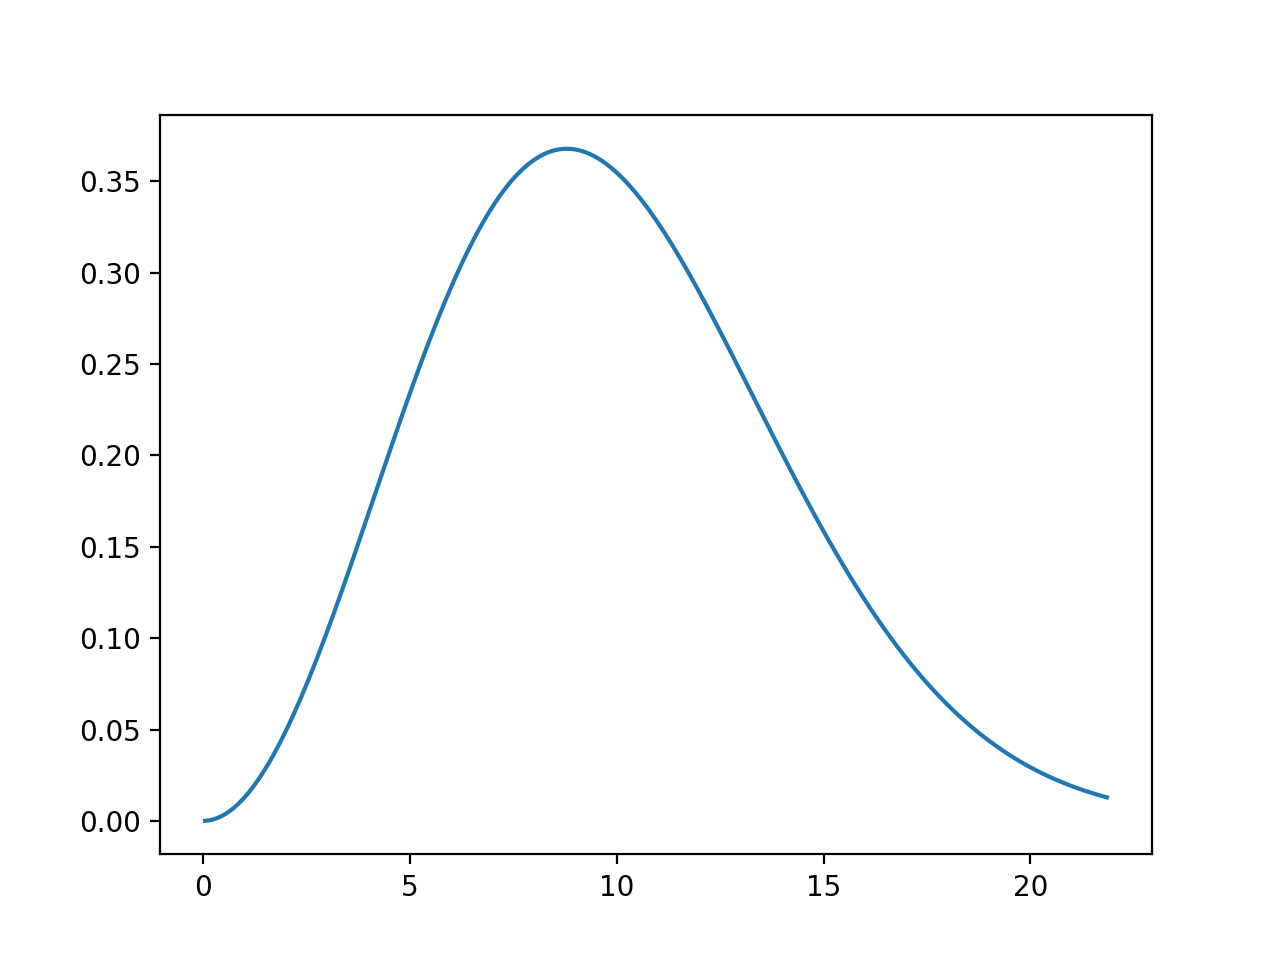

In [185]:
plt.figure()
plt.plot(Q, DW2*np.exp(-DW2))

In [189]:
dos = hh.load('/SNS/users/lj7/simulations/ARCS/graphite/getdos-non-Rad-multiEi-30meV/work/final-dos.h5')

In [190]:
e = dos.E
g = dos.I

<IPython.core.display.Javascript object>


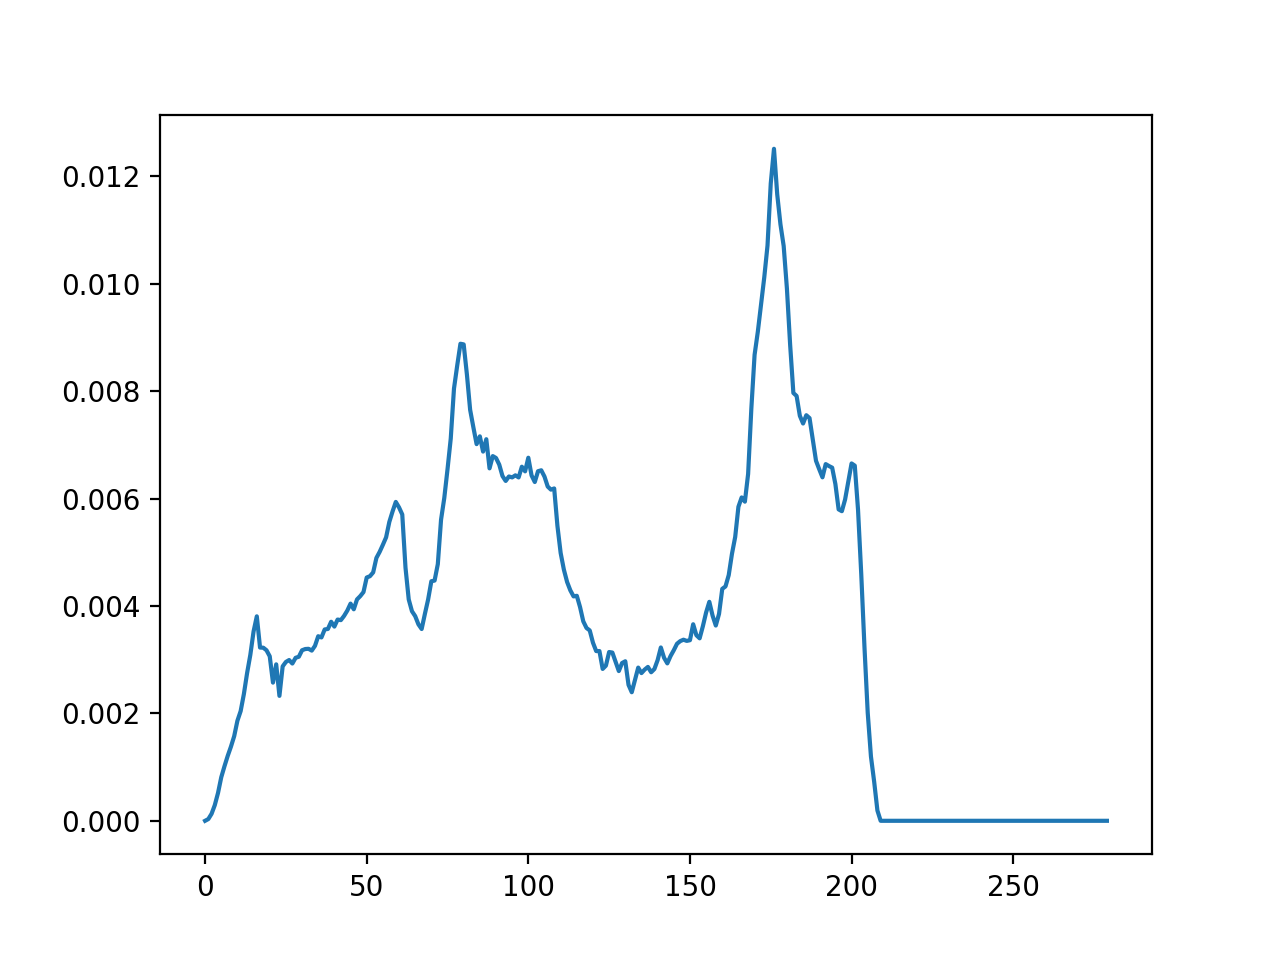

In [191]:
plt.figure()
plt.plot(e,g)

In [192]:
DW2 = phonon.DWExp(Q, M=12, E=e,g=g/np.sum(g), beta=beta, dE=e[1]-e[0])

<IPython.core.display.Javascript object>


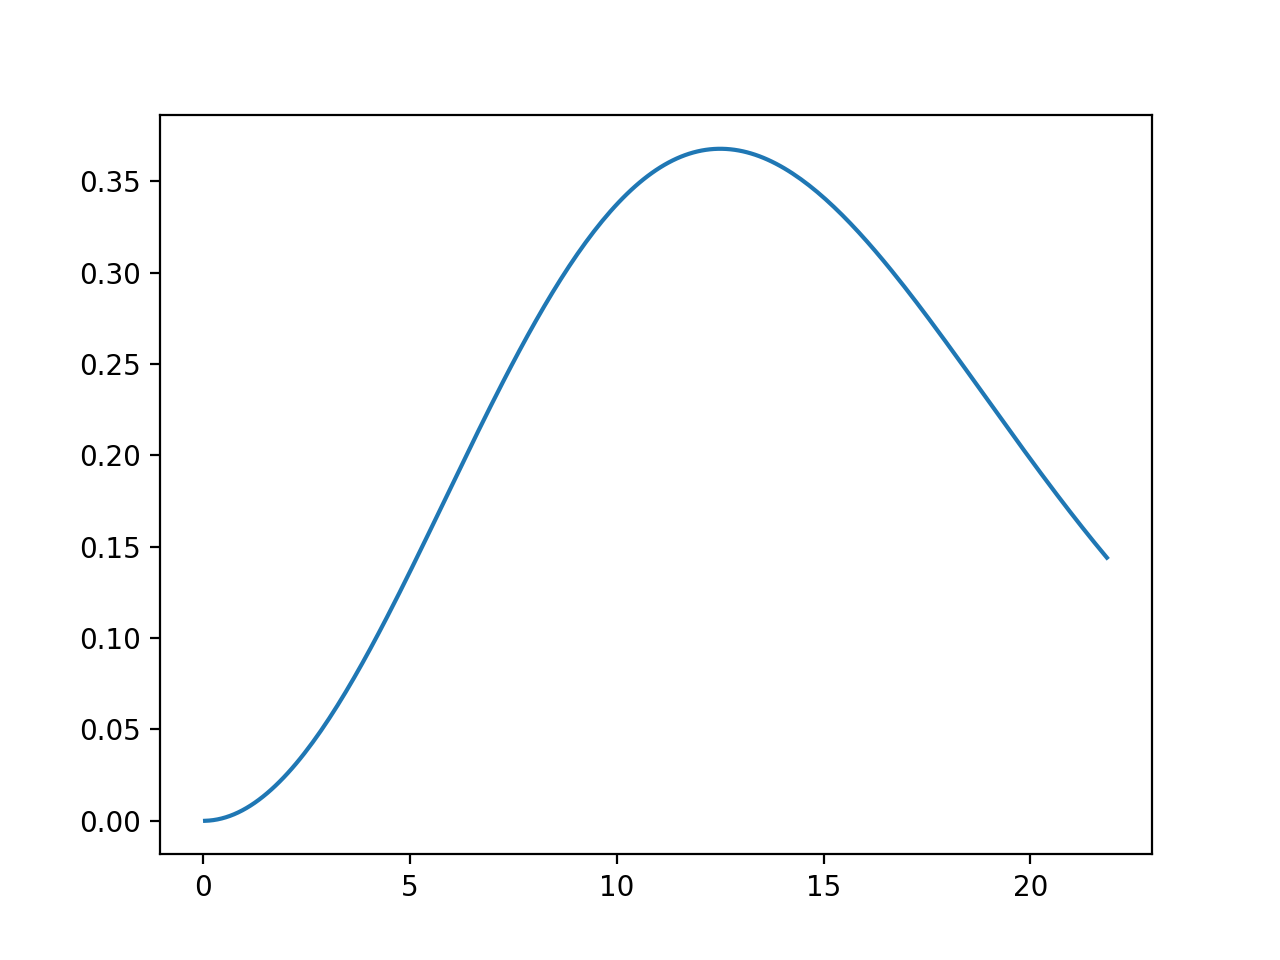

In [193]:
plt.figure()
plt.plot(Q, DW2*np.exp(-DW2))

In [137]:
I = IQEhist.I

In [134]:
thermal_factor = 1./2 * (1./np.tanh(1./2*E*beta)+1)

<IPython.core.display.Javascript object>


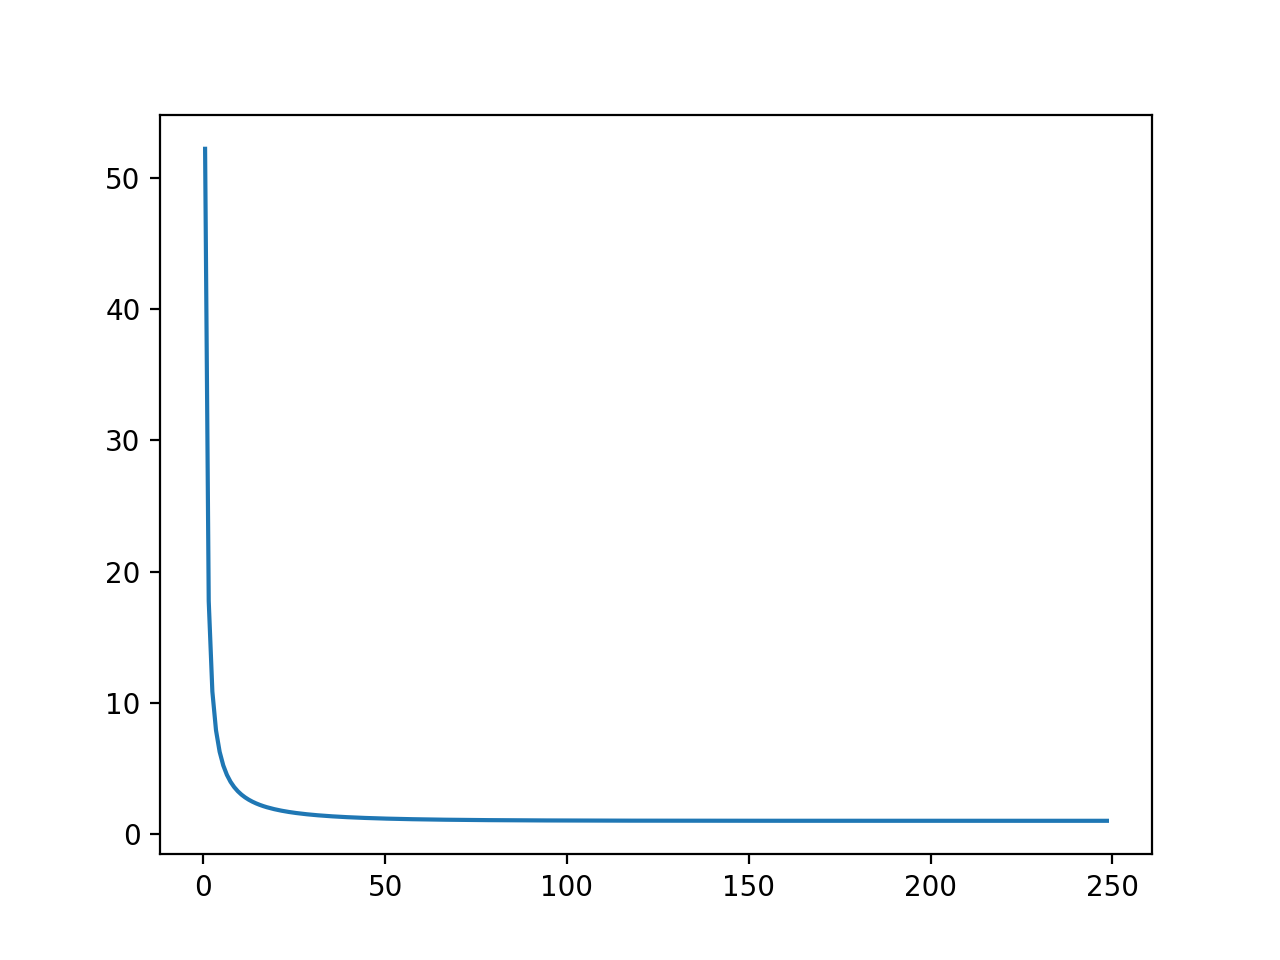

In [135]:
plt.figure()
plt.plot(E, thermal_factor)

In [229]:
IQEhist3 = H.histogram(
    'IQE',
    (H.axis('Q', boundaries=Qbb, unit='1./angstrom'),
     H.axis('E', boundaries=Ebb, unit='meV')),
    data=I*(np.exp(-DW2)/Q)[:, np.newaxis]*thermal_factor[np.newaxis, :])

In [230]:
from multiphonon import sqe

<IPython.core.display.Javascript object>


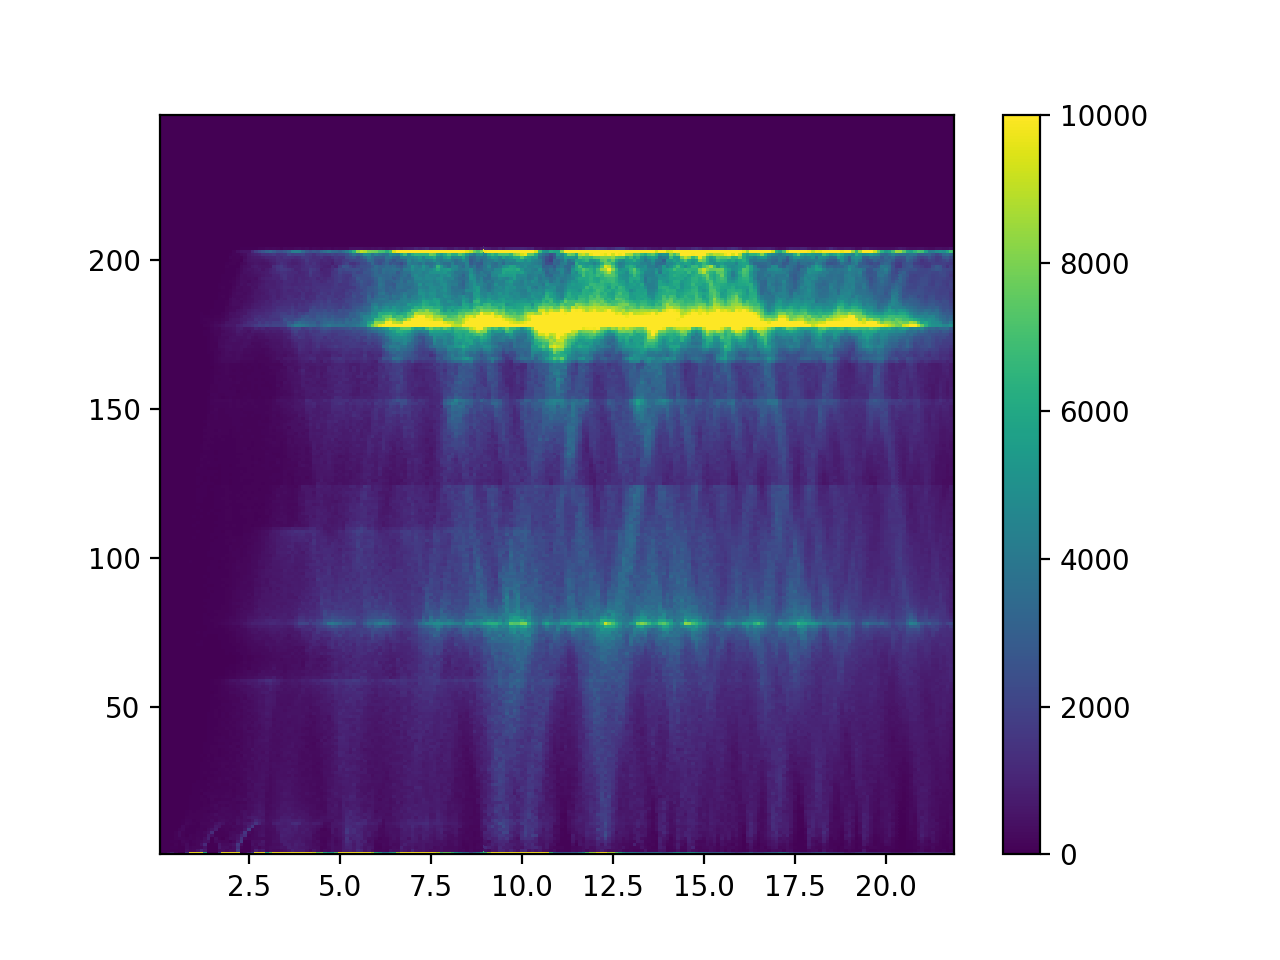

In [232]:
plt.figure()
sqe.plot(IQEhist3)
plt.clim(0, 1e4)

# Dynamical range

In [143]:
Ei = 300.
ki = conversion.e2k(Ei)
kf = conversion.e2k(Ei-E)

In [114]:
from mcni.utils import conversion

In [148]:
Qmin = ki-kf
Qmax = ((ki*ki + kf*kf - 2*ki*kf*np.cos(135.*np.pi/180)))**.5

In [233]:
I3 = IQEhist3.I
for iE, (E1, Qmin1, Qmax1) in enumerate(zip(E, Qmin, Qmax)):
    I3[Q<Qmin1, iE] = np.nan
    I3[Q>Qmax1, iE] = np.nan

<IPython.core.display.Javascript object>


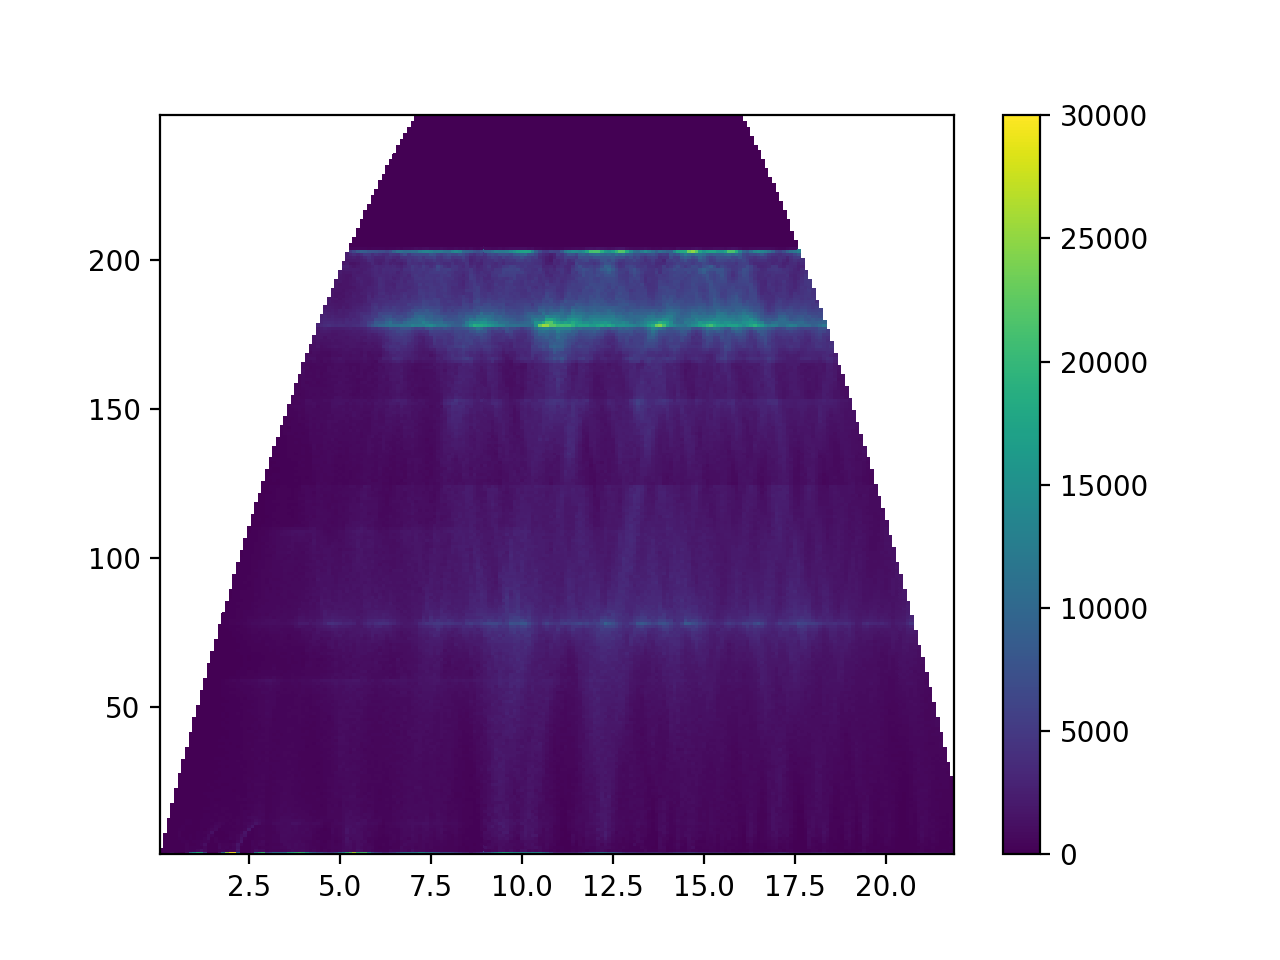

In [235]:
plt.figure()
sqe.plot(IQEhist3)
plt.clim(0, 3e4)

In [202]:
mpsqe = phonon.sqehist(e, g/np.sum(g), Qmin=0.05, Qmax=21.9, dQ=0.1, T=300., M=12, N=5, starting_order=2, Emax=600)

<IPython.core.display.Javascript object>


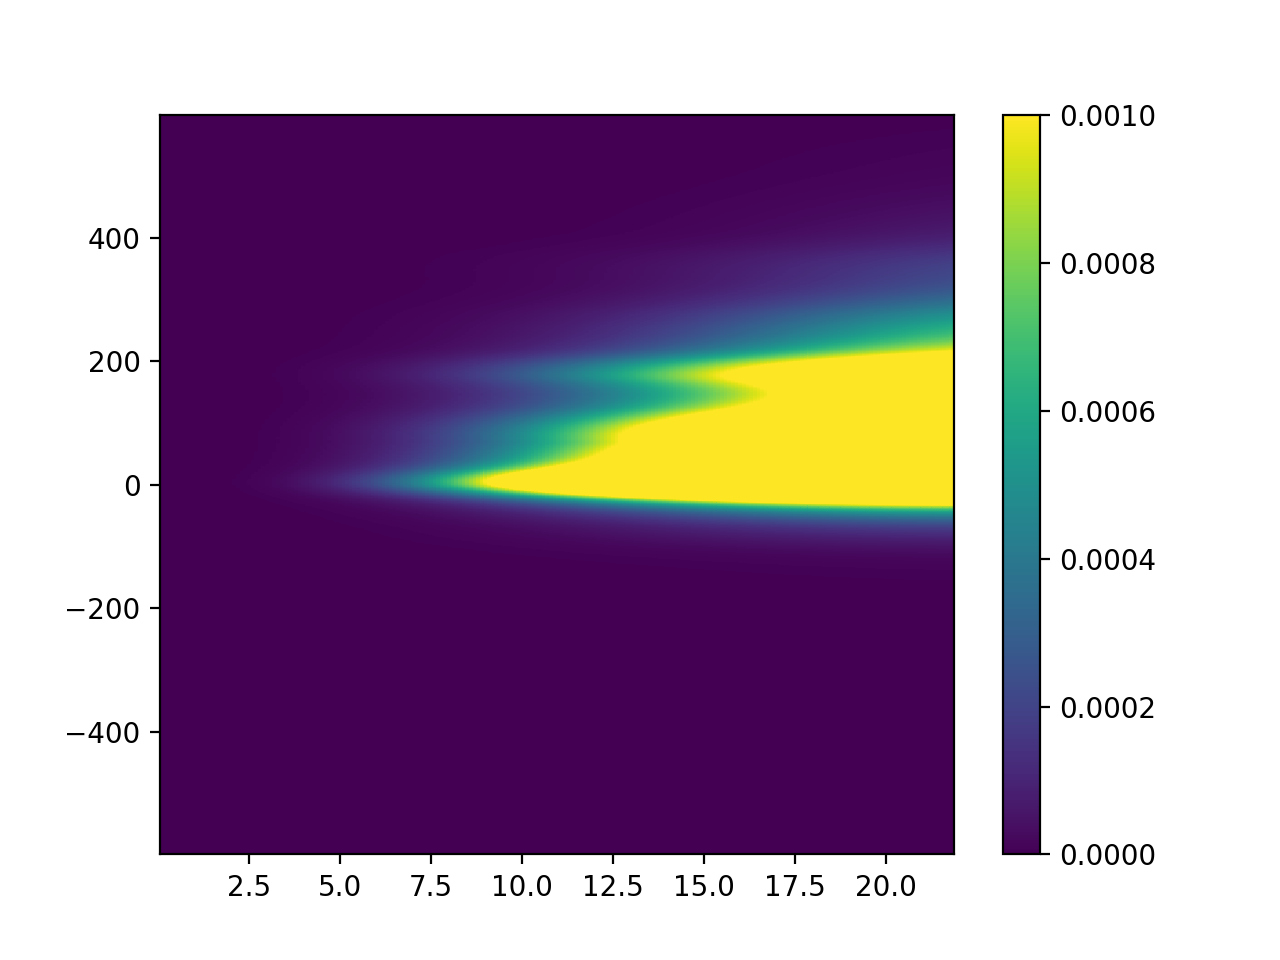

In [203]:
plt.figure()
sqe.plot(mpsqe)
plt.clim(0,0.001)

In [204]:
mpsqe1 = sqe.interp(mpsqe, E)

<IPython.core.display.Javascript object>


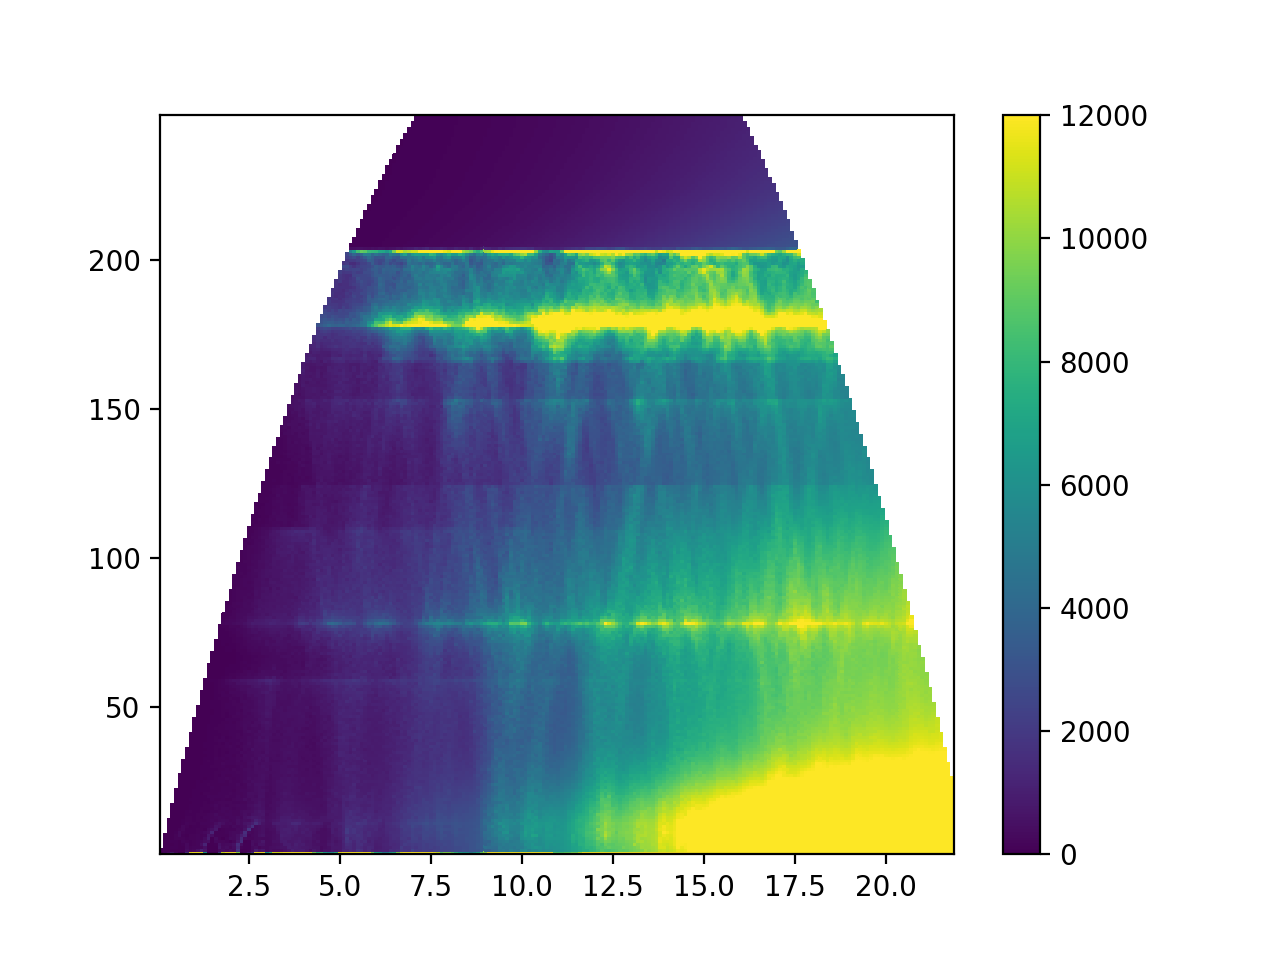

In [239]:
plt.figure()
sqe.plot(IQEhist3*(3e-7,0) + mpsqe1)
plt.clim(0,1.2e4)